# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

import seaborn as sns
sns.set_theme()

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [4]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
path_mean_housing_units = Path('Data/mean_housing_units.csv')
path_average_sales = Path('Data/average_sales_prices.csv')
path_neighborhood = Path('Data/neighborhood_data_.csv')
path_neighborhood_geo_data = Path('Data/neighborhood_geo_data.csv')
path_exp_neighborhood = Path('Data/expensive_neighborhoods_per_year.csv')



sfo_data = pd.read_csv(file_path, index_col="year")
mean_housing_units = pd.read_csv(path_mean_housing_units, index_col="year")
average_sales_prices = pd.read_csv(path_average_sales, index_col='year')
neighborhood_data = pd.read_csv(path_neighborhood)
neighborhood_geo_data = pd.read_csv(path_neighborhood_geo_data, index_col='Neighborhood')
df_expensive_neighborhoods_per_year = pd.read_csv(path_exp_neighborhood)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [18]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    min_val = mean_housing_units.values.min()
    max_val = mean_housing_units.values.max()
    err_val = mean_housing_units.values.std()/np.sqrt(mean_housing_units.shape[0])
    y_min = (min_val - err_val)
    y_max = (max_val + err_val)
    ax =  mean_housing_units.plot.bar(ylim=(y_min, y_max), title='Housing Units per Year')

    return ax

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    ax = average_sales_prices['gross_rent'].plot()
    ax.set_title('Average Gross Rent by Year', fontsize=20)
    ax.set(xlabel='Year', ylabel='Avg Gros Rent')
    
    return ax



def average_sales_price():
    """Average Sales Price Per Year."""
    
    ax = average_sales_prices['sale_price_sqr_foot'].plot()
    ax.set_title('Average Price per SqFt by Year', fontsize=20)
    ax.set(xlabel='Year', ylabel='Avg Price per SqFt')
    return ax


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    ax = neighborhood_data.hvplot(
        x='year',
        y='sale_price_sqr_foot',
        groupby='neighborhood', 
        xlabel='Year',
        ylabel='Avg Sale Price per SqFt')
    return ax


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    top_10_data = neighborhood_data.groupby('neighborhood').mean().sort_values('sale_price_sqr_foot',ascending=False)[:10]
    ax = top_10_data['sale_price_sqr_foot'].hvplot.bar(rot=90)
    return ax

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    ax = neighborhood_data.hvplot.bar(
        x='year',
        y=['gross_rent','sale_price_sqr_foot'], 
        groupby='neighborhood',
        stacked=False,
        rot=90,
        xlabel='Year',
        ylabel='Price',
        title='Top 10 Most Expensive Neighborhoods in SFO')
    return ax

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    fig = px.parallel_coordinates(
        df_expensive_neighborhoods_per_year[['sale_price_sqr_foot','housing_units','gross_rent']], 
        color='sale_price_sqr_foot',
        title='Parallel Coordinates Analysis of Most Expencsive San Francisco Neighborhoods')
    
    return fig


def parallel_categories():
    """Parallel Categories Plot."""
    
    df_1 = df_expensive_neighborhoods_per_year.set_index('year')
    df_1 = df_1.groupby('neighborhood').mean().reset_index()
    df_1 = df_1.sort_values(by=['sale_price_sqr_foot'], ascending=False)
    ax = px.parallel_categories(
        df_1,
        dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units','gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            'neighborhood': 'Neighborhood',
            'sale_price_sqr_foot': 'Price per SqFt',
            'housing_units' : 'Housing Units',
            'gross_rent' : 'Gross Rent'
        }, height=400)
    return ax



def neighborhood_map():
    """Neighborhood Map."""

    # Create a scatter mapbox to analyze neighborhood info
    ax = px.scatter_mapbox(
        neighborhood_geo_data,
        lat="Lat",
        lon="Lon",
        color='gross_rent',
        size='sale_price_sqr_foot',
        zoom=11,
        height=500)
    
    return ax


def sunburst():
    """Sunburst Plot."""
    
    fig = px.sunburst(
    df_expensive_neighborhoods_per_year, 
    path=['year', 'neighborhood'], 
    color='gross_rent',
    values = 'sale_price_sqr_foot',
    color_continuous_scale='blues',
    title='Costs Analysis of the Most Expensive Neighborhood in San Francisco',
    height=400)
    return fig

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive07594')
    [1] Row
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive07603')
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive07609')
        [3] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive07615')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive07624')
                    [0] HoloViews(DynamicMap, name='interactive07624')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [2] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive07661')
                    [0] HoloViews(DynamicMap, name='interactive07661')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [3] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive07698')
    [3] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive07790')

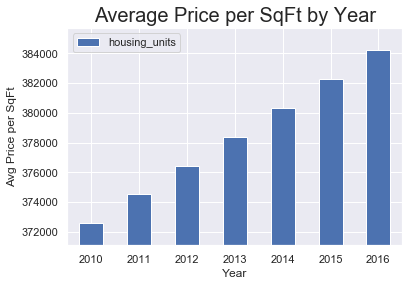

In [20]:
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard

welcome_panel = pn.Column('# Average Sales Price per SqFt and Gross Rent in San Francisco  ', neighborhood_map)
yearly_panel = pn.Row(
    '# Neighborhood Analysis', 
    housing_units_per_year, 
    average_gross_rent,
    average_sales_price
)
neighborhood_panel = pn.Column(
    '# Neighborhood Analysis',
    average_price_by_neighborhood,
    most_expensive_neighborhoods_rent_sales, 
    top_most_expensive_neighborhoods
)

parallel_panel = pn.Column

sunburst_panel = pn.Row(
    '#Sunburst Analysis',
    sunburst
)

tabs = pn.Tabs(
    ("Welcome", welcome_panel),
    ("Yearly Market Analysis", yearly_panel),
    ("Neighborhood  Analysis", neighborhood_panel),
    ('Parallel Plot Analysis', parallel_panel),
    ('Sunburst Analysis', sunburst)
)



# Create the dashboard
tabs

## Serve the Panel Dashboard

In [70]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [100]:
#housing_units_per_year()

In [125]:
#average_gross_rent()

In [126]:
#average_sales_price()

In [105]:
#average_price_by_neighborhood()

In [108]:
#top_most_expensive_neighborhoods()

In [113]:
#most_expensive_neighborhoods_rent_sales()

In [131]:
#neighborhood_map()

In [135]:
#parallel_categories()

In [140]:
#parallel_coordinates()

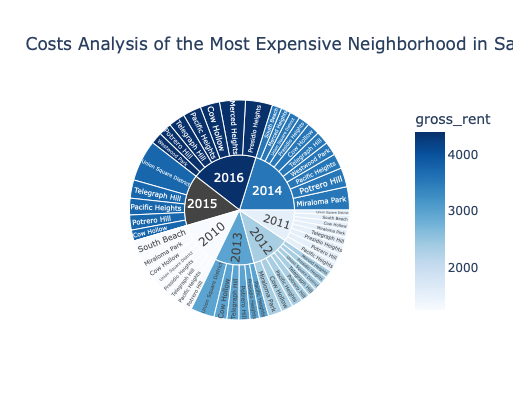

In [19]:
sunburst()